In [11]:
import pickle as pkl

with open('data/dataset.pkl', 'rb') as f:
    data = pkl.load(f)

tonic = {}
mode = {}
style = {}
root = set()
durations = {}
scrap = set()
tot = 0
for name in data:
    tot += 1
    d = data[name]
    t = d['tonic']
    m = d['mode']
    s = d['style']
    if t in tonic:
        tonic[t] += 1
    else:
        tonic[t] = 1
    if m in mode:
        mode[m] += 1
    else:
        mode[m] = 1
    if s in style:
        style[s] += 1
    else:
        style[s] = 1

    for l in d['root']:
        root.update(l)

    for note in d['nmat']:
        dur = str(note[1]-note[0])

        if dur in ['15', '16', '13', '14', '11', '9', '10', '12', '26']:
            scrap.add(name)
        if dur in durations:
            durations[dur] += 1
        else:
            durations[dur] = 1

print("Tonic:")
print(tonic)

print("Mode:")
print(mode)

print("Style:")
print(style)

print("Root:")
print(root)

print("Durations:")
durations = list(durations.items())
durations.sort(key=lambda x : x[1], reverse=True)
print(durations)

print("Scrap:")
print("total samples: ", tot)
print("scrapping: ", len(scrap))
print(len(scrap)/tot)



TypeError: 'dict' object is not callable

In [14]:
import pickle as pkl

with open('data/dataset.pkl', 'rb') as f:
    data = pkl.load(f)

# print an excerpt of the dataset
#print("Excerpt:")
for name in data:
    print(name)
    print(data[name])
    break

TypeError: 'dict' object is not callable

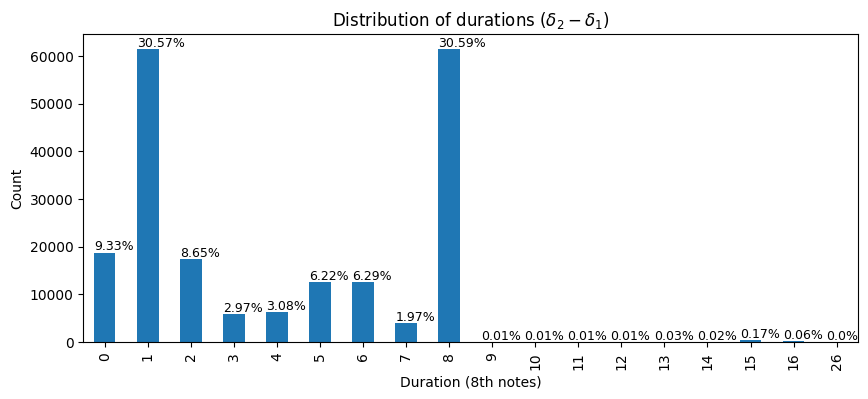

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(durations, columns=['duration', 'count'])

# Convert the 'duration' column to int type
df['duration'] = df['duration'].astype(int)

# Sort the dataframe based on the 'duration' column
df = df.sort_values('duration')

# Calculate percentage of total for each count
df['percentage'] = (df['count'] / df['count'].sum()) * 100

# Plot the sorted dataframe
ax = df.plot.bar(x='duration', y='count', figsize=(10, 4))

# Set the y-axis to log scale
#ax.set_yscale('log')

ax.set_title('Distribution of durations ($\delta_2 - \delta_1$)')

ax.set_xlabel('Duration (8th notes)')

ax.set_ylabel('Count')

# Add percentage on top of each bar
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x() + 0.0, i.get_height()+500, \
            str(round((i.get_height()/df['count'].sum())*100, 2))+'%', fontsize=9,
                color='black')
# remove the legend
ax.get_legend().remove()
plt.show()

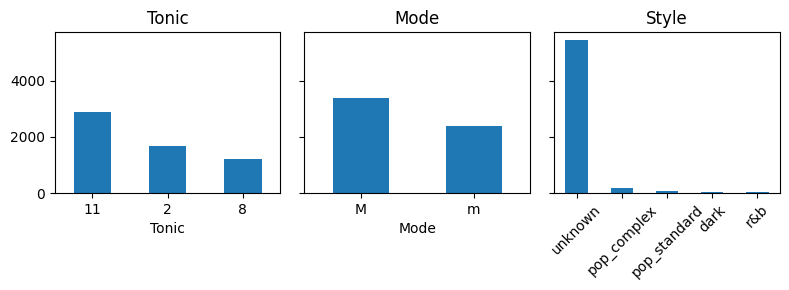

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# your data
tonic = {11: 2895, 2: 1672, 8: 1195}
mode = {'M': 3372, 'm': 2390}
style = {'unknown': 5442, 'pop_complex': 192, 'pop_standard': 74, 'dark': 32, 'r&b': 22}

# create dataframes
df_tonic = pd.DataFrame(list(tonic.items()), columns=['Tonic', 'Count'])
df_mode = pd.DataFrame(list(mode.items()), columns=['Mode', 'Count'])
df_style = pd.DataFrame(list(style.items()), columns=['Style', 'Count'])

# create subplots
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharey=True)

# plot data
df_tonic.plot.bar(x='Tonic', y='Count', ax=axes[0], legend=False)
df_mode.plot.bar(x='Mode', y='Count', ax=axes[1], legend=False)
df_style.plot.bar(x='Style', y='Count', ax=axes[2], legend=False)

# set titles
axes[0].set_title('Tonic')
axes[1].set_title('Mode')
axes[2].set_title('Style')

# rotate the xticks on each axes
for i, ax in enumerate(axes):
    if i == 2:
        # rotate "style" xticks 45 degrees
        plt.sca(ax)
        plt.xticks(rotation=45)
        # also remove the xlabel
        ax.set_xlabel('')
    else:
        plt.sca(ax)
        plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [8]:
from src.dataset import *

dataset = MusicDataset("data/dataset_processed.txt", 256)

# sort the w2i.keys() in alphabetical order
w2i = {k: v for k, v in sorted(dataset.w2i.items(), key=lambda item: item[0])}

w2i



Creating dataset...
Creating w2i and i2w...


100%|██████████| 5167/5167 [00:00<00:00, 102877.01it/s]


Indexing pieces...


100%|██████████| 5167/5167 [00:00<00:00, 26106.50it/s]


Writing data to json...
Writing vocabs to json...
Done


{'-': 6,
 '/2': 11,
 '2': 9,
 '3': 18,
 '4': 29,
 '6': 39,
 '8': 32,
 '<eos>': 2,
 '<pad>': 0,
 '<sos>': 1,
 'A': 13,
 'A,': 5,
 'A,,': 22,
 'A,,,': 51,
 'B': 14,
 'B,': 34,
 'B,,': 36,
 'B,,,': 59,
 'C': 4,
 'C,': 25,
 'C,,': 40,
 'C,,,': 58,
 'D': 27,
 'D,': 7,
 'D,,': 28,
 'D,,,': 62,
 'E': 31,
 'E,': 21,
 'E,,': 37,
 'E,,,': 60,
 'F': 10,
 'F,': 24,
 'F,,': 26,
 'F,,,': 50,
 'G': 12,
 'G,': 16,
 'G,,': 17,
 'G,,,': 52,
 '[': 3,
 ']': 8,
 '^A': 43,
 '^A,': 46,
 '^C': 48,
 '^D': 61,
 '^D,': 44,
 '^F': 41,
 '^F,': 47,
 '^G': 38,
 '^G,': 42,
 '^c': 33,
 '^d': 57,
 '^f': 56,
 'a': 49,
 'b': 55,
 'c': 19,
 "c'": 53,
 'd': 23,
 "d'": 54,
 'e': 20,
 'f': 35,
 'g': 45,
 'z': 30,
 '|': 15}

# Plot test and val split

This cell saves new data, it is a one off so it is turned off.

In [33]:
import torch
import torch.nn as nn
import torch.utils.data as tud

import seaborn as sns
import matplotlib.pyplot as plt

run_cell = False

if run_cell:
    torch.manual_seed(0)

    max_sequence_length = 256

    dataset = MusicDataset(
        data_file="data/dataset.json",
        vocab_file="data/vocab.json",
        max_sequence_length=max_sequence_length,
        create_data=False
    )


    train_data, val_data = tud.random_split(
        dataset, [0.9, 0.1])

    # get the first sample from the training data
    sample = train_data[0][0]

    #for itr, sample in enumerate([train_data, val_data]):
    for data, data_path in zip([train_data, val_data], ["data/training_data.txt", "data/validation_data.txt"]):
        for sample in data:
            tune = []
            for index in sample[0]:
                # wrap index.numpy() to a character
                i = str(index.numpy())
                # get the character from the index
                c = dataset.i2w[i]
                tune.append(c)
            # join the characters to a space separated string
            # and save it to a file
            print(" ".join(tune), file=open(data_path, "a"))

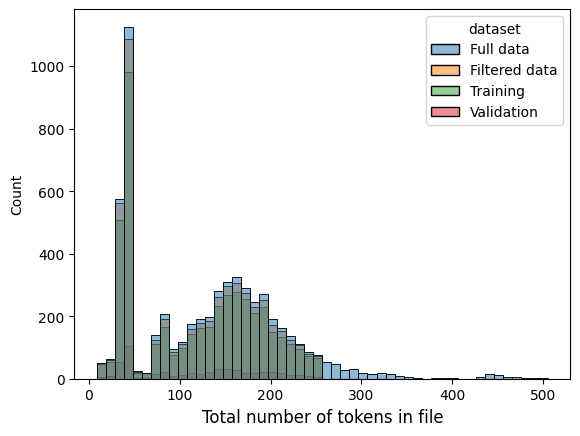

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# read each new line in data/dataset.txt and split it by space

with open('data/dataset_full.txt', 'r') as file:
    lines_full = file.readlines()
    # remove '<sos>', '<eos>' and '<pad>' tokens
    lines_full = [line.replace('<sos>', '').replace('<eos>', '').replace('<pad>', '') for line in lines_full]
    lines_full = [line.strip().split(' ') for line in lines_full]
    lines_full = [(i, len(line), len(set(line)), 'Full data', 'X') for i, line in enumerate(lines_full)]

with open('data/dataset_processed.txt', 'r') as file:
    lines_filtered = file.readlines()
    # remove '<sos>', '<eos>' and '<pad>' tokens
    lines_filtered = [line.replace('<sos>', '').replace('<eos>', '').replace('<pad>', '') for line in lines_filtered]
    lines_filtered = [line.strip().split(' ') for line in lines_filtered]
    lines_filtered = [(i, len(line), len(set(line)), 'Filtered data', 'X') for i, line in enumerate(lines_filtered)]

with open('data/training_data.txt', 'r') as file:
    lines_processed = file.readlines()
    # remove '<sos>', '<eos>' and '<pad>' tokens
    lines_processed = [line.replace('<sos>', '').replace('<eos>', '').replace('<pad>', '') for line in lines_processed]
    lines_processed = [line.strip().split(' ') for line in lines_processed]
    lines_processed = [(i, len(line), len(set(line)), 'Training', 'Y') for i, line in enumerate(lines_processed)]

with open('data/validation_data.txt', 'r') as file:
    lines_validation = file.readlines()
    # remove '<sos>', '<eos>' and '<pad>' tokens
    lines_validation = [line.replace('<sos>', '').replace('<eos>', '').replace('<pad>', '') for line in lines_validation]
    lines_validation = [line.strip().split(' ') for line in lines_validation]
    lines_validation = [(i, len(line), len(set(line)), 'Validation', 'Y') for i, line in enumerate(lines_validation)]



# combine the two lists
lines_combined = lines_full + lines_filtered + lines_processed + lines_validation

df = pd.DataFrame(lines_combined, columns=['index', 'count', 'unique', 'dataset', 'xy'])

# do a seaborn histplot with hue as dataset
sns.histplot(data=df, x='count', hue='dataset',bins=50, kde=False);

# rename x-axis to 'Total number of tokens in file'
plt.xlabel('Total number of tokens in file', fontsize=12);

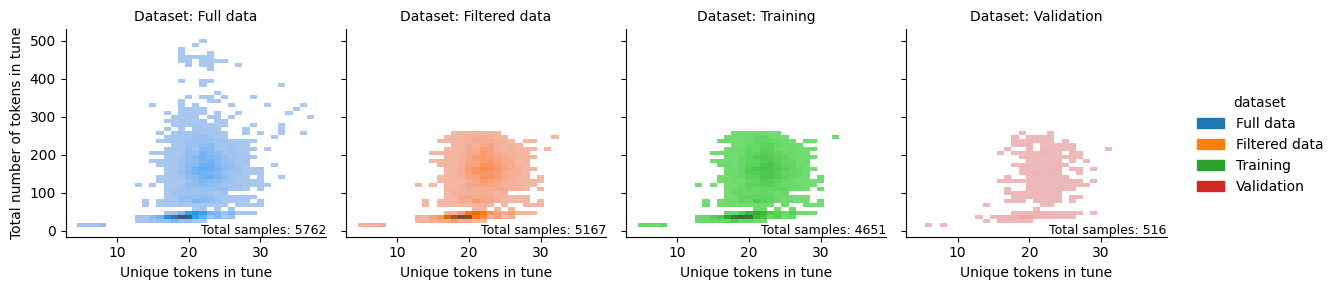

In [72]:
import seaborn as sns

g = sns.displot(
    data=df, 
    x="unique", 
    y="count", 
    col="dataset",
    hue="dataset", 
    kind="hist", 
    height=3, 
    aspect=1, 
    discrete=(True, False),
)

# set axis labels and titles
g.set_axis_labels("Unique tokens in tune", "Total number of tokens in tune")
g.set_titles("Dataset: {col_name}")

# add the total number of samples to each plot
for ax in g.axes.flatten():
    # get the dataset name from the title
    dataset_name = ax.get_title().split(": ")[-1]
    
    # calculate the total number of samples in this dataset
    total_samples = df[df["dataset"] == dataset_name]["count"].count()

    # add text to the plot with the total number of samples
    ax.text(1, 0.06, f"Total samples: {total_samples}", 
            transform=ax.transAxes, ha="right", va="top", fontsize=9)

g.tight_layout()


# Copy paste Markos code and see if we can show something funny

Loading data...
Creating model...
Creating splits...
Loading checkpoint lstm_l=2_es=64_hs=64_d=0.2_e=200_lr=0.001_bs=16/best.pytorch


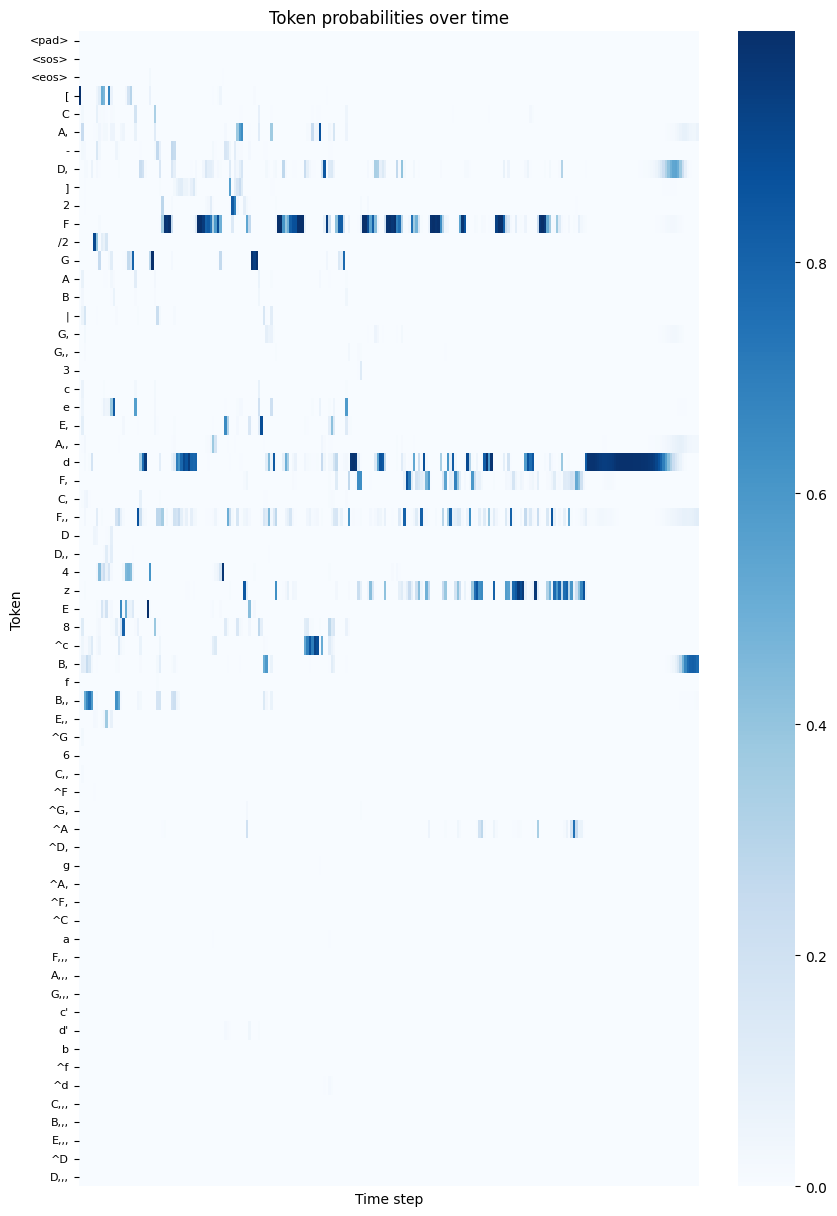

In [124]:
import torch
import time
import torch.nn as nn
import torch.utils.data as tud
import argparse
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

from src.lstm_model import *
from src.transf_model import *
from src.dataset import *


print("Loading data...")

torch.manual_seed(0)

# load dataset
max_sequence_length = 256

# load a checkpoint
load = "lstm_l=2_es=64_hs=64_d=0.2_e=200_lr=0.001_bs=16/best.pytorch"
layers=2
embedding_size=64
hidden_size=64
dropout=0.2
epochs=200
lr=0.001
batch_size=16

dataset = MusicDataset(
    data_file="data/dataset.json",
    vocab_file="data/vocab.json",
    max_sequence_length=max_sequence_length,
    create_data=False,
)

vocab_size = dataset.vocab_size
B = batch_size
L = dataset.max_sequence_length

print("Creating model...")

# model, optimizer, loss
model = LSTMModel(
    vocab_size=vocab_size,
    hidden_size=hidden_size,
    embedding_size=embedding_size,
    num_layers=layers,
    dropout=dropout,
    bidirectional=False,
)

model.eval()
#print(model)

print("Creating splits...")
train_data, val_data = tud.random_split(
    dataset, [0.9, 0.1]
)

# load previous checkpoint
if load != None:
    print(f"Loading checkpoint {load}")
    model.load_state_dict(torch.load(load, map_location=torch.device('cpu')))

torch.manual_seed(time.time())
gen = model.inference(
    dataset.sos_idx,
    dataset.eos_idx,
    device=device,
    max_len = 512,
    #mode=args.mode,
    #temperature=args.temperature,
)

#sample_x = torch.IntTensor(gen)

# find the index of the longest val_data sample
max_len = 0
max_idx = 0
for i, (x, y) in enumerate(val_data):
    if len(x) > max_len:
        max_len = len(x)
        max_idx = i


sample_x, sample_y = val_data[max_idx]

#print(sample_x)
logits = model(sample_x.unsqueeze(0))
probs = model.softmax(logits).squeeze(0)
probs = probs.detach().numpy().T

# plot probs as a seaborn heatmap
token_names = [dataset.i2w[str(i)] for i in range(probs.shape[0])]

sns.heatmap(probs, cmap="Blues", yticklabels=token_names, xticklabels=False)

# make the y-axis font smaller
plt.yticks(fontsize=8)
plt.ylabel("Token")
plt.xlabel("Time step")
plt.title("Token probabilities over time")

# make the plot higher
plt.gcf().set_size_inches(10, 15)




In [118]:
# plot all seaborn cmpap options
# plt.colormaps()


['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

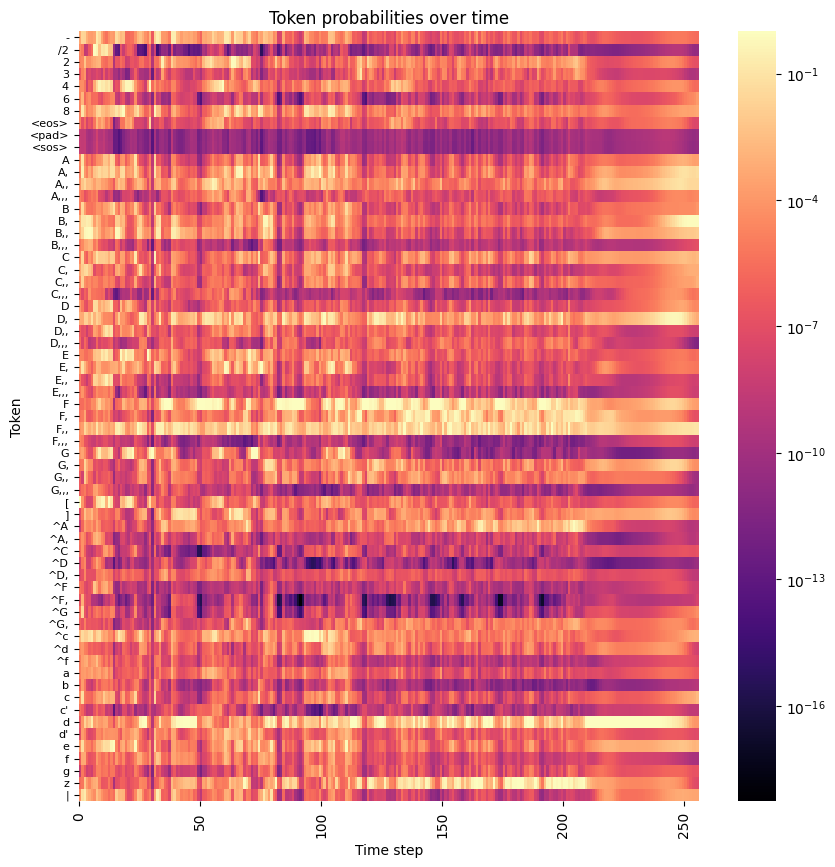

In [131]:
from matplotlib.colors import LogNorm

# save probs as a dataframe
df = pd.DataFrame(probs, index=token_names, columns=range(probs.shape[1]))

# sort the rows of the dataframe by the indices alphabetical order
df = df.sort_index()

# plot the dataframe as a seaborn heatmap
# make the cmap on a log scale
sns.heatmap(df, cmap="magma", yticklabels=True, xticklabels=True, norm=LogNorm())
# only show each 50th time step, with the first time step at 0
plt.xticks(range(0, probs.shape[1], 50))
plt.gca().set_xticklabels(range(0, probs.shape[1], 50))
# also label the x-axis with the time step

# make the y-axis font smaller
plt.yticks(fontsize=8)
plt.ylabel("Token")
plt.xlabel("Time step")
plt.title("Token probabilities over time")
plt.gcf().set_size_inches(10, 10)

# Now heatmap embeddings

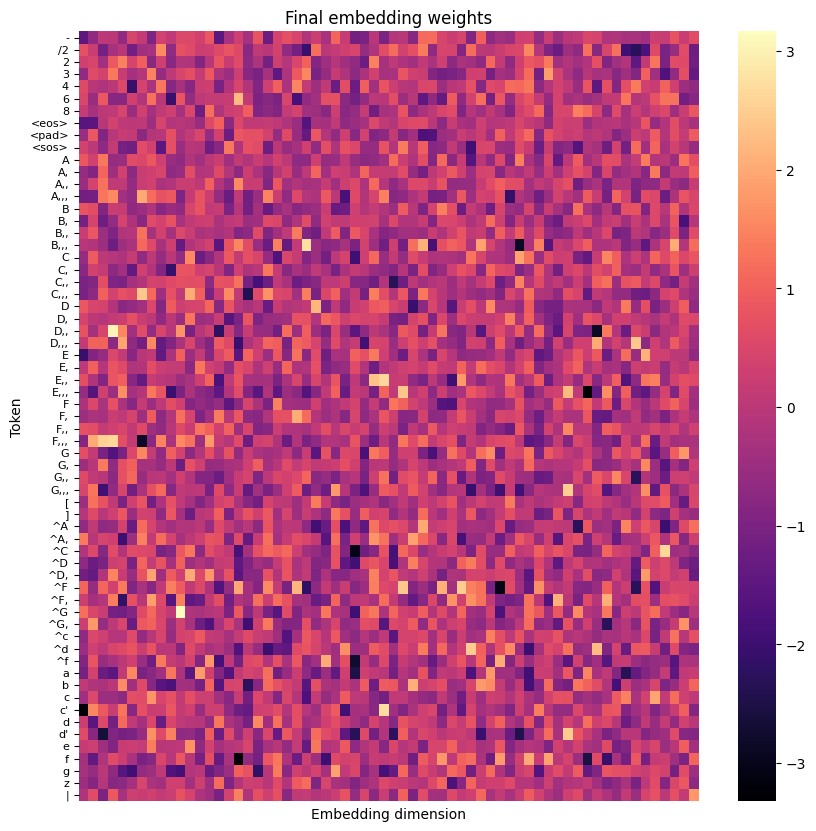

In [136]:
# turn model.embedding.weight into a dataframe
df = pd.DataFrame(model.embedding.weight.detach().numpy(), index=token_names)

# sort the rows of the dataframe by the indices alphabetical order
df = df.sort_index()

# plot the dataframe as a seaborn heatmap
sns.heatmap(df, cmap="magma", yticklabels=True, xticklabels=False)

plt.yticks(fontsize=8)
plt.ylabel("Token")
plt.xlabel("Embedding dimension")
plt.title("Final embedding weights")
plt.gcf().set_size_inches(10, 10)

In [ ]:
mat = model.embedding.weight
mat = mat.detach().numpy()
p = 2
out = np.dot(mat, mat.T)
norm = np.outer(
    np.linalg.norm(mat, axis=1, ord=p), np.linalg.norm(mat.T, axis=0, ord=p)
)
print(norm.shape)
out = np.multiply(
    out,
    1 / norm,
)
out /= np.max(out)

# turn out into a dataframe
df = pd.DataFrame(out, index=token_names, columns=token_names)

# sort the rows of the dataframe by the indices alphabetical order
df = df.sort_index()

# sort by the columns alphabetical order
df = df.sort_index(axis=1)

#df[df < 0.25] = 0

# plot the dataframe as a seaborn heatmap
sns.heatmap(df, cmap="magma", yticklabels=True, xticklabels=True)



# rotate the y-axis labels
plt.xticks(rotation=60, fontsize=8)
plt.ylabel("Token")
plt.xlabel("Token")
plt.title("Cosine similarity between tokens in embedding space")
plt.gcf().set_size_inches(10, 10)

(63, 63)


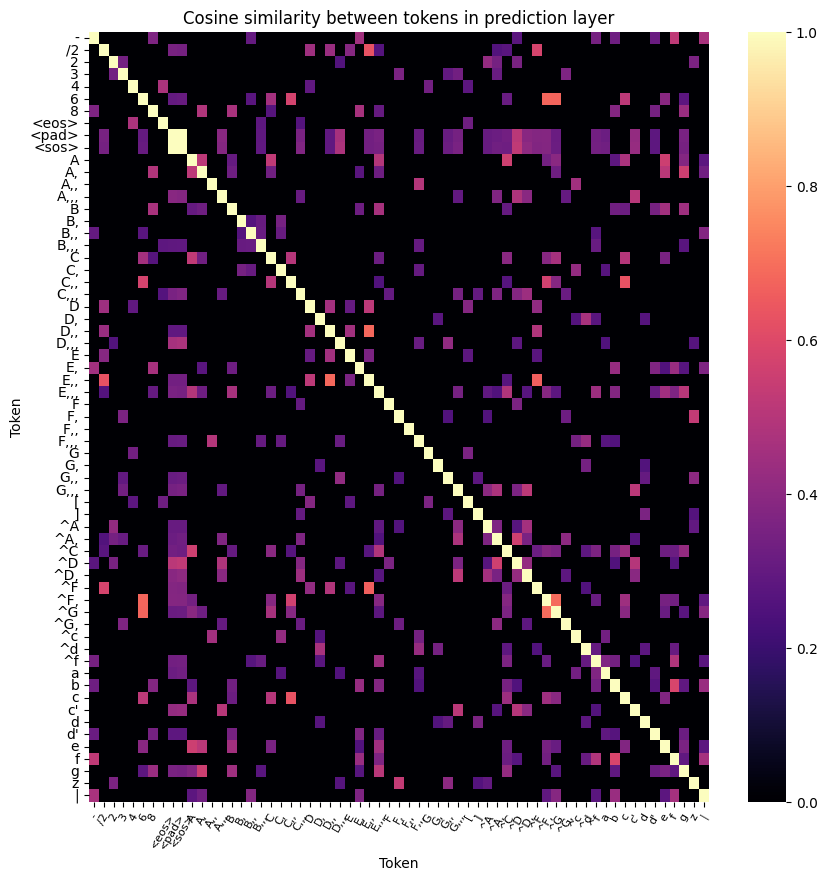

In [154]:
mat = model.prediction_layer.weight
mat = mat.detach().numpy()
p = 2
out = np.dot(mat, mat.T)
norm = np.outer(
    np.linalg.norm(mat, axis=1, ord=p), np.linalg.norm(mat.T, axis=0, ord=p)
)
print(norm.shape)
out = np.multiply(
    out,
    1 / norm,
)
out /= np.max(out)

# turn out into a dataframe
df = pd.DataFrame(out, index=token_names, columns=token_names)

# sort the rows of the dataframe by the indices alphabetical order
df = df.sort_index()

# sort by the columns alphabetical order
df = df.sort_index(axis=1)

df[df < 0.25] = 0

# plot the dataframe as a seaborn heatmap
sns.heatmap(df, cmap="magma", yticklabels=True, xticklabels=True)



# rotate the y-axis labels
plt.xticks(rotation=60, fontsize=8)
plt.ylabel("Token")
plt.xlabel("Token")
plt.title("Cosine similarity between tokens in prediction layer")
plt.gcf().set_size_inches(10, 10)

# Try to reproduce above plots with the Transformer

Loading data...
Creating model...
Creating splits...
Loading checkpoint transf_l=3_es=64_hs=64_d=0.2_e=200_lr=0.001_bs=16_ah=4/best.pytorch


/Users/linusostlund/Documents/GitHub/deep_learning_project/DD2424-project/lib/python3.9/site-packages/torch/nn/modules/transformer.py:562: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._transformer_encoder_layer_fwd(


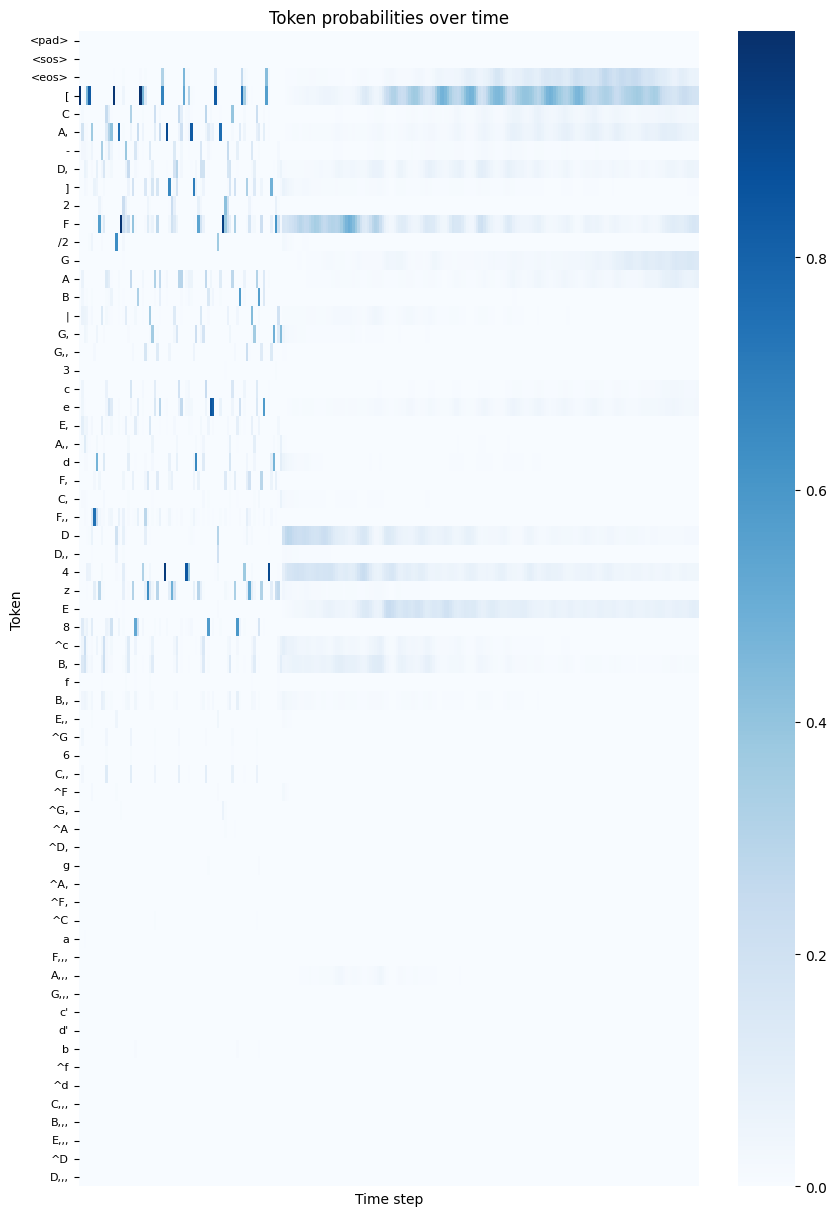

In [156]:
import torch
import time
import torch.nn as nn
import torch.utils.data as tud
import argparse
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

from src.lstm_model import *
from src.transf_model import *
from src.dataset import *


print("Loading data...")

torch.manual_seed(0)

# load dataset
max_sequence_length = 256

# load a checkpoint
load = "transf_l=3_es=64_hs=64_d=0.2_e=200_lr=0.001_bs=16_ah=4/best.pytorch"
layers=3
embedding_size=64
hidden_size=64
dropout=0.2
epochs=200
lr=0.001
batch_size=16
ah=4

dataset = MusicDataset(
    data_file="data/dataset.json",
    vocab_file="data/vocab.json",
    max_sequence_length=max_sequence_length,
    create_data=False,
)

vocab_size = dataset.vocab_size
B = batch_size
L = dataset.max_sequence_length

print("Creating model...")

# model, optimizer, loss
model = TransfModel(
    vocab_size=vocab_size,
    hidden_size=hidden_size,
    embedding_size=embedding_size,
    num_layers=layers,
    dropout=dropout,
    attention_heads=ah,
)

model.eval()
#print(model)

print("Creating splits...")
train_data, val_data = tud.random_split(
    dataset, [0.9, 0.1]
)

# load previous checkpoint
if load != None:
    print(f"Loading checkpoint {load}")
    model.load_state_dict(torch.load(load, map_location=torch.device('cpu')))

torch.manual_seed(time.time())
gen = model.inference(
    dataset.sos_idx,
    dataset.eos_idx,
    device=device,
    max_len = 512,
    #mode=args.mode,
    #temperature=args.temperature,
)

#sample_x = torch.IntTensor(gen)

# find the index of the longest val_data sample
max_len = 0
max_idx = 0
for i, (x, y) in enumerate(val_data):
    if len(x) > max_len:
        max_len = len(x)
        max_idx = i


sample_x, sample_y = val_data[max_idx]

#print(sample_x)
logits = model(sample_x.unsqueeze(0))
probs = model.softmax(logits).squeeze(0)
probs = probs.detach().numpy().T

# plot probs as a seaborn heatmap
token_names = [dataset.i2w[str(i)] for i in range(probs.shape[0])]

sns.heatmap(probs, cmap="Blues", yticklabels=token_names, xticklabels=False)

# make the y-axis font smaller
plt.yticks(fontsize=8)
plt.ylabel("Token")
plt.xlabel("Time step")
plt.title("Token probabilities over time")

# make the plot higher
plt.gcf().set_size_inches(10, 15)




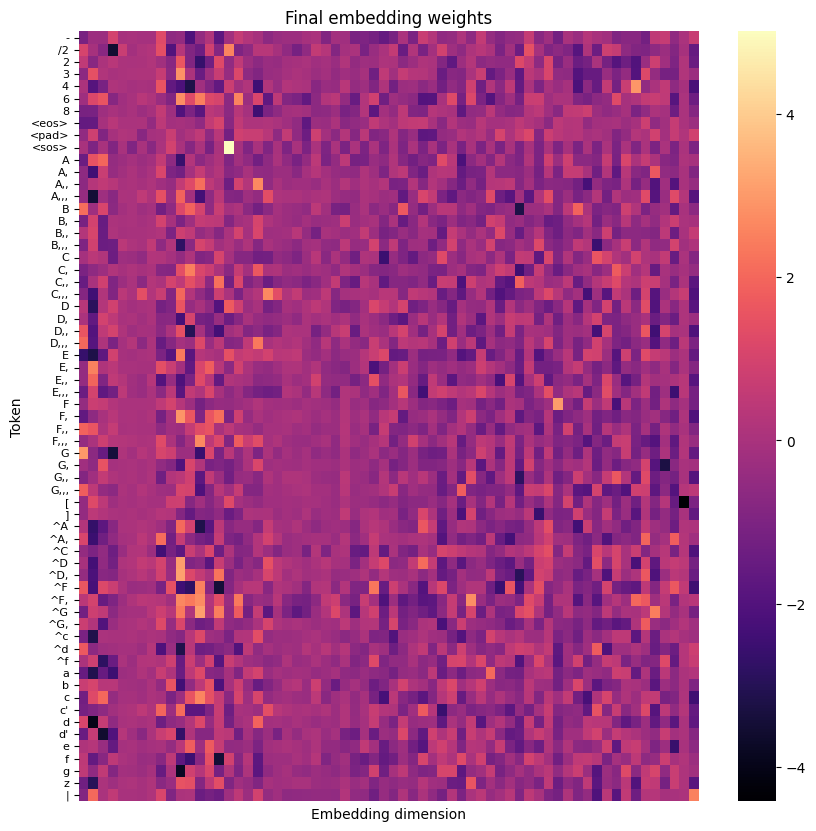

In [158]:
# turn model.embedding.weight into a dataframe
df = pd.DataFrame(model.embedding.weight.detach().numpy(), index=token_names)

# sort the rows of the dataframe by the indices alphabetical order
df = df.sort_index()

# plot the dataframe as a seaborn heatmap
sns.heatmap(df, cmap="magma", yticklabels=True, xticklabels=False)

plt.yticks(fontsize=8)
plt.ylabel("Token")
plt.xlabel("Embedding dimension")
plt.title("Final embedding weights")
plt.gcf().set_size_inches(10, 10)

(63, 63)


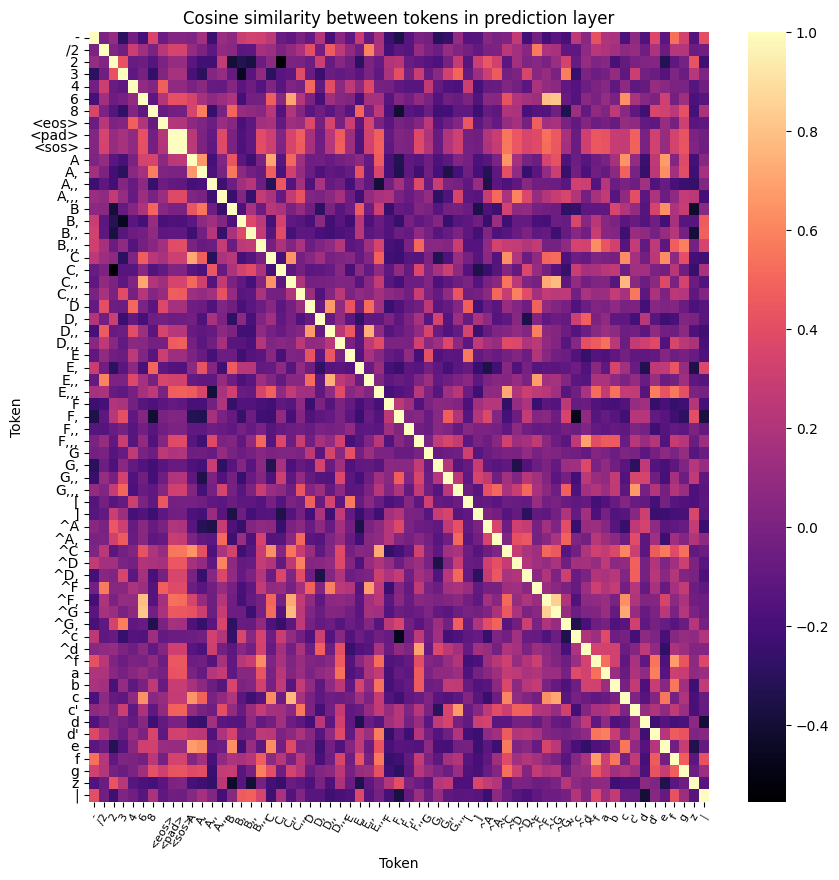

In [160]:
mat = model.prediction_layer.weight
mat = mat.detach().numpy()
p = 2
out = np.dot(mat, mat.T)
norm = np.outer(
    np.linalg.norm(mat, axis=1, ord=p), np.linalg.norm(mat.T, axis=0, ord=p)
)
print(norm.shape)
out = np.multiply(
    out,
    1 / norm,
)
out /= np.max(out)

# turn out into a dataframe
df = pd.DataFrame(out, index=token_names, columns=token_names)

# sort the rows of the dataframe by the indices alphabetical order
df = df.sort_index()

# sort by the columns alphabetical order
df = df.sort_index(axis=1)

#df[df < 0.25] = 0

# plot the dataframe as a seaborn heatmap
sns.heatmap(df, cmap="magma", yticklabels=True, xticklabels=True)



# rotate the y-axis labels
plt.xticks(rotation=60, fontsize=8)
plt.ylabel("Token")
plt.xlabel("Token")
plt.title("Cosine similarity between tokens in prediction layer")
plt.gcf().set_size_inches(10, 10)

(63, 63)


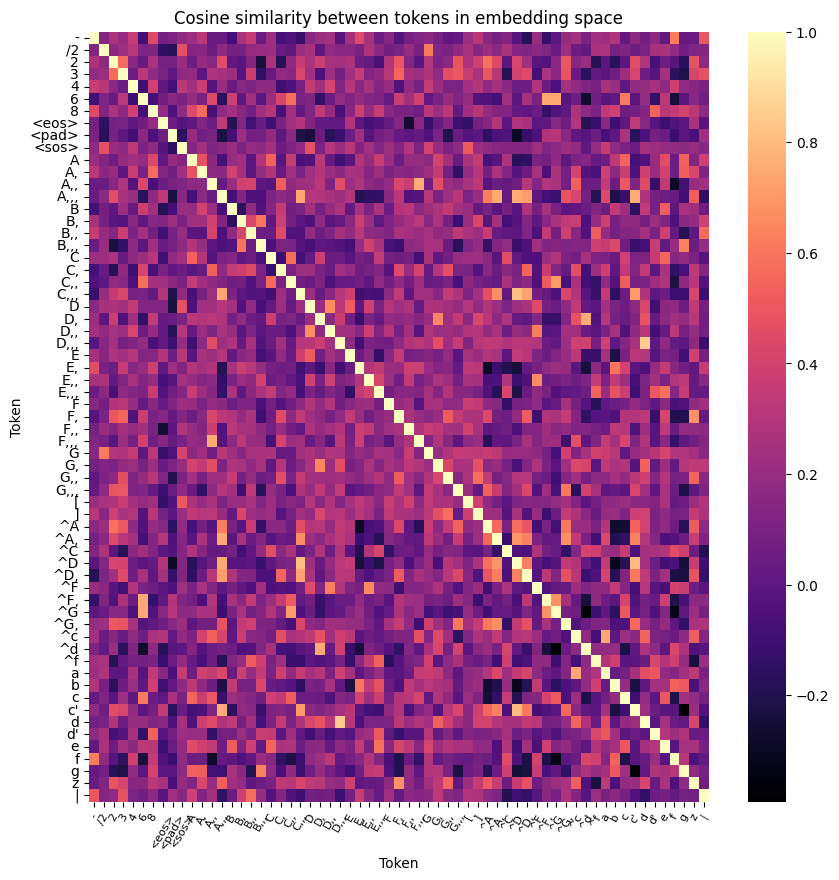

In [161]:
mat = model.embedding.weight
mat = mat.detach().numpy()
p = 2
out = np.dot(mat, mat.T)
norm = np.outer(
    np.linalg.norm(mat, axis=1, ord=p), np.linalg.norm(mat.T, axis=0, ord=p)
)
print(norm.shape)
out = np.multiply(
    out,
    1 / norm,
)
out /= np.max(out)

# turn out into a dataframe
df = pd.DataFrame(out, index=token_names, columns=token_names)

# sort the rows of the dataframe by the indices alphabetical order
df = df.sort_index()

# sort by the columns alphabetical order
df = df.sort_index(axis=1)

#df[df < 0.25] = 0

# plot the dataframe as a seaborn heatmap
sns.heatmap(df, cmap="magma", yticklabels=True, xticklabels=True)



# rotate the y-axis labels
plt.xticks(rotation=60, fontsize=8)
plt.ylabel("Token")
plt.xlabel("Token")
plt.title("Cosine similarity between tokens in embedding space")
plt.gcf().set_size_inches(10, 10)